In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install gpxpy
%pip install contextily
%pip install folium
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from gpx_analyser import gpxAnalyserClass

In [2]:
gpxAnalyseDay1 = gpxAnalyserClass("29-01-2025.gpx")
gpxAnalyseDay2 = gpxAnalyserClass("31-01-2025.gpx")
df = gpxAnalyseDay2.df
print(df.describe())

              lat         lon         ele          hr         cad  \
count  440.000000  440.000000  440.000000  440.000000  440.000000   
mean    40.551275   -3.649083  699.872045  152.438636  180.181818   
std      0.006096    0.002157    8.716523   21.434242   11.228569   
min     40.542336   -3.651089  684.800000   70.000000  100.000000   
25%     40.546158   -3.650410  693.500000  141.000000  181.000000   
50%     40.550219   -3.650170  699.000000  150.000000  182.000000   
75%     40.556737   -3.648548  706.100000  173.000000  183.000000   
max     40.561707   -3.643572  721.900000  181.000000  189.000000   

              dist    time_acc        pace  
count   440.000000  440.000000  440.000000  
mean   2627.487206   15.684583    5.725265  
std    1572.069983   10.470684    2.888474  
min       0.000000    0.000000    3.369704  
25%    1201.167352    5.875000    4.507054  
50%    2740.480937   13.825000    4.976670  
75%    3961.238327   25.504167    5.754251  
max    5394.837130

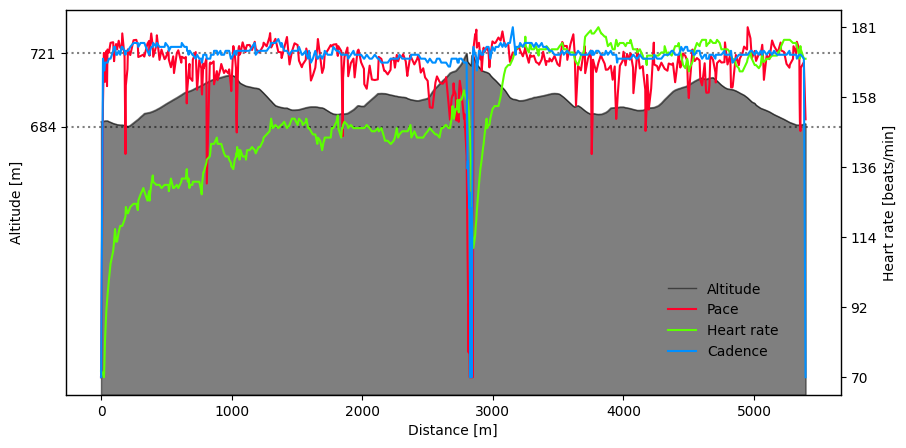

In [10]:
gpxAnalyseDay2.plot_parameters('pace', 'hr', 'cad', focused_param='hr')